<a href="https://colab.research.google.com/github/EvaSamoilenko/Monster.com-jobs/blob/main/Monster_com_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Данные

[Monster.com jobs](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data) - датасет о вакансиях, данные в котором намеренно не предобработаны.

Есть несколько сомнительных столбцов с 1 уникальным значением, тип работы не стандартизирован, расположение может содержать штат, город и почтовый индекс или только часть из этих данных, или совершенно неясные данные вроде "Contact name Tony Zerio" или "Sr. Process Engineer, Manufacturing", в графе с зарплатой помимо зарплаты есть вещи вроде "Excellent Pay and Incentives" и другие проблемы.

Практически все столбцы в датасете нельзя использовать для анализа без предобработки.

Целью обработки датасета будем считать использование для многостороннего изучения данных в дальнейшем, то есть мы обработаем данные таким образом, чтобы их удобно было использовать для широкого спекра задач анализа данных.

### Изучение датасета

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt

In [ ]:
#prevent SettingWithCopyWarning message from appearing
pd.options.mode.chained_assignment = None

Загрузим датасет и выведем случайные несколько строк из него.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/job/monster_com-job_sample.csv')

df.sample(10)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
9081,United States of America,US,NaN,No,jobs.monster.com,Reports to: Operations DirectorDepartment: Ope...,Field Service Job in Denver,Full Time,"Denver, CO 80239",Retail,http://jobview.monster.com/Field-Service-Job-D...,18.00 - 22.00 $ /hour,Student (High School),ed9e90569bb19e855fddc5dab46883d9
8530,United States of America,US,NaN,No,jobs.monster.com,Are you looking for a payroll opportunity in t...,Payroll Processor Job in Denver,Full Time Temporary/Contract/Project,"Denver, CO 80202",NaN,http://jobview.monster.com/payroll-processor-j...,NaN,Accounting/Finance/Insurance,84e99fdf57c88be03203d861eceaab66
10365,United States of America,US,NaN,No,jobs.monster.com,Classification:Non-ExemptReports To:Machine Sh...,Machinist/Programmer Job in Marple Township,Full Time Employee,"Marple Township, PA 19008",Manufacturing - Other,http://jobview.monster.com/Machinist-Programme...,NaN,Manufacturing/Production/Operations,eee9fda99dbd81b57a475b9dba4fcd6b
18847,United States of America,US,NaN,No,jobs.monster.com,"Pyramid Healthcare, Inc. is looking to fill th...",Pyramid Healthcare Positions Job in Altoona,Part Time,"Altoona, PA 16602",Healthcare Services,http://jobview.local-jobs.monster.com/Pyramid-...,NaN,Experienced (Non-Manager),ff065799c839ee1c57820c19fabc3ee9
11204,United States of America,US,NaN,No,jobs.monster.com,"Report this job About the Job TRAINING, REHABI...",Monster,NaN,"TRAINING, REHABILITATION, &DEVELOPMENT INSTITU...",NaN,http://jobview.monster.com/cashiers-dining-roo...,NaN,NaN,cc7b83f911a84d446aaa37713179e81b
8347,United States of America,US,NaN,No,jobs.monster.com,"We are looking for organized, positive, and en...",Jr. Field Manager Job in Denver,"Full Time, Employee","Denver, CO 80238",Construction - Residential & Commercial/Office,http://jobview.monster.com/jr-field-manager-jo...,13.00 - 15.00 $ /year,Building Construction/Skilled Trades,855e0dc6e163d1fc7384e9b33469187f
17557,United States of America,US,NaN,No,jobs.monster.com,"Land Science Technologies, a division of REGEN...",District Manager - South Central Job in Dallas,Full Time,"Dallas, TX 75201",Engineering Services,http://jobview.monster.com/District-Manager-So...,NaN,Experienced (Non-Manager),f7806b292fe971b70860b764a3af52ba
13725,United States of America,US,NaN,No,jobs.monster.com,"Health, Safety, and Environmental Specialist ...",Health,Full Time,"Midland, MI",Manufacturing - Other,http://jobview.monster.com/Health-Safety-Envir...,"75,000.00 - 85,000.00 $ /year",Experienced (Non-Manager),33734ed0e05a65aec49ef665cf8cd390
19106,United States of America,US,3/7/2016,No,jobs.monster.com,COOK I (ARKFD-15-1218-F)Bowhead seeks a part-t...,Cook Job in North Little Rock,"Part Time, Employee","North Little Rock, AR",Computer Software,http://jobview.monster.com/Cook-Job-North-Litt...,NaN,Food Services/Hospitality,9f1309f7791439ca9bfbf83abd7d800c
2270,United States of America,US,NaN,No,jobs.monster.com,Job Description Job #: 710403Job Title: Const...,TMOBJP - Construction Coordinator II - Overlan...,Full Time Employee,Job Description Job #: 710403Job Title: Const...,Computer/IT Services,http://jobview.monster.com/tmobjp00006413-cons...,NaN,Experienced (Non-Manager),e91b67c894a94a2a8833aa40554398cc


In [ ]:
df.describe()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
count,22000,22000,122,22000,22000,22000,22000,20372,22000,15133,22000,3446,16806,22000
unique,1,1,78,1,1,18744,18759,39,8423,738,22000,1737,163,22000
top,United States of America,US,9/22/2016,No,jobs.monster.com,12N Horizontal Construction Engineers Job Desc...,Monster,Full Time,"Dallas, TX",Healthcare Services,http://jobview.monster.com/it-support-technici...,"40,000.00 - 100,000.00 $ /year",Experienced (Non-Manager),11d599f229a80023d2f40e7c52cd941e
freq,22000,22000,6,22000,22000,104,318,6757,646,1919,1,50,4594,1


**что же тут не так?**

**['country']** и **['country_code']** (текст):  содержат единственные уникальные значения "United States of America" и "US" соответственно

**['date_added']** (дата): в большинстве случаев является пустым значением

**['has_expired']** (bool): Always false

**['job_board']** (текст): является единственным значением "jobs.monster.com", так как данные взяты с одного сайта

**['job_description']** (текст): нет единой структуры описания

**['job_title']** (текст): наименование должности не стуктуризированно, содержит данные из других колонок

**['job_type']** (текст): заполнен по-разному сформулированными полями, передающими одну и ту же информацию, к примеру, "Full Time" и "Full Time Employee"

**['location']** (текст): город + штат + индекс в разных соотношениях

**['organization']** (текст): основная область занятости нанимающей организации может быть избавлена от лишних данных, например, "Other"

**['page_url']** (url): ссылка на единый сайт + колонка job_title

**['salary']** (текст): содержит пустые значения, нет определённой системы исчисления (где-то зарплата в час, где-то в год), может быть интервалом или одним числом

**['sector']** (текст): сфера деятельности, может состоять из нескольких подразделений

Каждый столбец может включать в себя (из)лишнюю информацию, дополнительные комментарии, пустые или повторяющиеся значения.

#### Пустые значения

Начнем работу: проанализируем пустые ячейки.
Выясним, в каких столбцах и в каком количестве отсутствуют данные.


In [ ]:
pd.DataFrame(df.isna().sum(), df.columns.values, ['NaN'])

,NaN
country,0
country_code,0
date_added,21878
has_expired,0
job_board,0
job_description,0
job_title,0
job_type,1628
location,0
organization,6867


<Axes: >

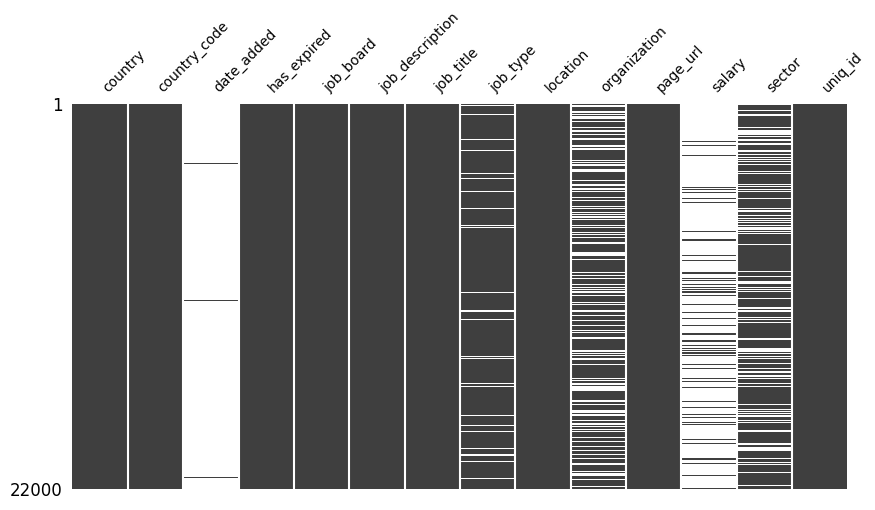

In [ ]:
msno.matrix(df, figsize=(10, 5), fontsize=10, sparkline=False)

Что будет, если мы примем решение удалить все строки, где есть пустые значения?


In [ ]:
dropped = df.dropna().reset_index()
dropped.shape

(5, 15)

В случае удаления строк, содержащих хотя бы одно пустое значение, датасет станет слишком маленьким, состоящим всего из 5 строк, что  мало для любого исследования.

Принимаем решение сохранить как можно больше данных, удалять все – плохой план. Если удалить все, можем потерять важную информацию.

#### Нерелевантные колонки

Оценим, какие столбцы необходимо оставить, а какие можно удалить.

1. **Столбцы, в которых встречается всего одно значение**
*   ['country'] и ['country_code'] содержат единственные уникальные значения "United States of America" и "US" соответственно
*   ['has_expired'] всегда false/No
*   ['job_board'] является единственным значением "jobs.monster.com"

Столбцы не релевантны для анализа.

2. **Столбцы, в которых содержатся данные, которые есть еще в каком-то столбце**
* ['job_description'] содержит штат, который прописан в ['location']
* ['page_url'] состоит из ссылки на единый сайт из ['job_board'] + значение ['job_title']
* ['job_title'] является группировкой данных из других столбцов (location, job_type, sector)

3. **Какие столбцы содержательно нерелевантны?**
* ['uniq_id'] очевидно уникально для каждого значения и не важно для анализа
* ['country'], ['country_code'], ['has_expired'] и ['job_board'] содержат по одному/единственному значению, то есть не влияют на анализ
* ['date_added'] в основном состоит из пустых значений
* ['page_url'] уникально для каждого значения, но представляет из себя информацию, содержащуюся в ['job_title'], то есть является не релевантной

#### Дублирование данных

Определим столбцы, по которым можно однозначно идентифицировать запись в датасете. Одинаковыми будем считать строки, в которых значения в этих столбцах совпадает.

Удалим одно из двух повторений и сравним, как изменились характеристики датасета.

**Вывод**: учитывая то, что ['job_description'] состоит из разноформатных данных из других колонн, ['uniq_id'] уникально для каждой должности, ['page_url'] опирается на ['job_title'], а остальные столбцы содержат мало или одно уникальное значение, следующая подборка является опциональной.

In [ ]:
df.drop_duplicates(subset=['job_title', 'job_type', 'organization', 'location', 'salary']).describe()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
count,20046,20046,114,20046,20046,20046,20046,18555,20046,13636,20046,3268,15192,20046
unique,1,1,76,1,1,18059,18759,39,8423,738,20046,1737,162,20046
top,United States of America,US,5/26/2016,No,jobs.monster.com,12N Horizontal Construction Engineers Job Desc...,Monster,Full Time,"Dallas, TX",Healthcare Services,http://jobview.monster.com/it-support-technici...,"40,000.00 - 100,000.00 $ /year",Experienced (Non-Manager),11d599f229a80023d2f40e7c52cd941e
freq,20046,20046,4,20046,20046,93,293,6355,561,1700,1,50,4228,1


### Обработка датасета

#### Первичная обработка

Первым делом устраним дубликаты и отсутствующие значения. Удалим все, что можно удалить без потери данных. На всякий случай сохраним копию датасета. В конце нам понадобится оценивать результаты. Она пригодится.

In [ ]:
from copy import deepcopy

df_copy = deepcopy(df)

In [ ]:
# Удаление нерелевантных столбцов, строк или столбцов с пустыми ячейками
df.drop(columns=['country', 'country_code', 'date_added', 'has_expired', 'job_board', 'page_url', 'uniq_id'], inplace=True)

In [ ]:
# Удаление дубликатов
df.drop_duplicates(subset=['job_title', 'job_type', 'organization', 'location', 'salary'], inplace=True)

In [ ]:
df.sample(10)

,job_description,job_title,job_type,location,organization,salary,sector
20404,Description: No industry is moving faster than...,Monster,NaN,Description: No industry is moving faster than...,NaN,NaN,NaN
16356,Location US-TX-San Antonio ID 86536 Category...,Senior Controller Unit - Healthcare Job in San...,"Full Time, Employee","San Antonio, TX",NaN,NaN,Accounting/Finance/Insurance
4209,".TAD PGS, INC. is currently seeking a System A...",System Administrator Job in Offut Afb,NaN,"Offut Afb, NE",NaN,NaN,NaN
6835,Senior Systems EngineerEdinboro University is ...,Senior Systems Engineer Job in Erie,Full Time,"Erie, PA 16510",Education,NaN,Experienced (Non-Manager)
20994,"Customer Service Representative Job in Edison,...",Customer Service Rep Job in Edison NJ Job in E...,Full Time Employee,"Edison, NJ 08837",NaN,NaN,Administrative/Clerical
9971,Do you work part time or full time and need mo...,Manufacturing and Production Job in Neptune City,Full Time Employee,"Neptune City, NJ 07753",NaN,20.00 - 20.00 $ /hour,Manufacturing/Production/Operations
4294,"Superior Environmental Solutions, Inc. (SES) i...",Administrative Assistant Job in Cincinnati,Full Time Employee,"Cincinnati, OH 45246",Waste Management,NaN,Administrative/Clerical
3840,Seeking Physicians with the following speciali...,Physician Multiple Specialities Great Perks Jo...,Full Time,"Davenport, IA 52804",Healthcare Services,NaN,Experienced (Non-Manager)
6059,2014 Pillar Award winner - Multifamily Develop...,Maintenance Technician - Willowbrook Job in As...,"Part Time, Employee","Ashtabula, OH 44004",Real Estate/Property Management,NaN,Installation/Maintenance/Repair
6462,91L Construction Vehicle Repairer Job Descript...,L Construction Vehicle Repairer Job in Mckenzie,Full Time Employee,"Mckenzie, TN 38201",NaN,NaN,Entry Level


#### Обработка колонки location

Анализ форматов в столбце `location`.

In [ ]:
df['location'] = df['location'].str.strip()
df = df[df['location'].apply(lambda x: len(x.split()) < 6)]
df['location'] = (df['location'].apply(lambda x: x.replace('Address ', ''))
.apply(lambda x: x.replace('Location:', ''))
.apply(lambda x: x.replace('\xa0', ''))
.apply(lambda x: x.replace(' \xa0', ''))
.apply(lambda x: x.replace(' \xa0 ', '')))
# .apply(lambda x: x.replace(' ,', ',')))

df['location'].sample(10).unique().tolist()

['Portsmouth, VA 23708',
 'Knoxville, TN 37917',
 'Dallas, TX',
 'Miami, FL',
 'Contact name Justin Kim',
 'Cincinnati, OH 45201',
 'Eatontown, NJ 07724',
 'Cleveland, OH 44142',
 'Tulsa, OK 74132',
 'El Dorado, AR 71730']

Какие форматы встречаются сколько?

In [ ]:
formats = ["state", "city, state", "city, state code", "city code", "code", "state code", "city state", "city,state"]

reg_exes = (["^[A-Z]{2}$",
             "^[A-Z][a-z\.\-'/ ]+( ?[A-Z][a-z\.\-'/]*){0,3}, [A-Z]{2}$",
             "^[A-Z][a-z\.\-'/ ]+( ?[A-Z][a-z\.\-'/]*){0,3}, [A-Z]{2} [0-9]{5}$",
             "^[A-Z][a-z\.\-'/ ]+( ?[A-Z][a-z\.\-'/]*){0,3} [0-9]{4,5}$",
             "^[0-9]{5}$",
             "^[A-Z]{2} [0-9]{5}$",
             "^[A-Z][a-z\.\-'/ ]+( ?[A-Z][a-z\.\-'/]*){0,3} [A-Z]{2}$",
             "^[A-Z][a-z\.\-'/ ]+( ?[A-Z][a-z\.\-'/]*){0,3},[A-Z]{2}$"])

counter = []
format_dict = dict.fromkeys(formats)

for i, format in enumerate(formats):
  format_dict[format] = df[df['location'].str.match(reg_exes[i])]['location']
  counter.append(len(format_dict[format]))

formats.append('others')
counter.append(df.shape[0] - sum(counter))
print(counter)

[171, 6062, 10716, 297, 253, 21, 16, 46, 1007]


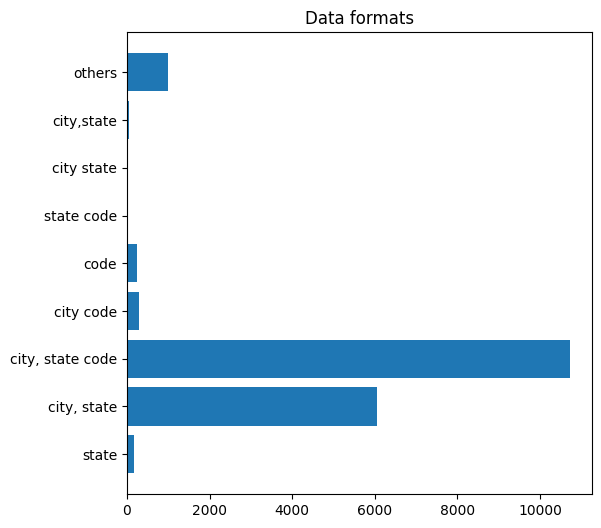

In [ ]:
plt.figure(figsize=(6,6))
plt.barh(width=counter, y=formats)
plt.title('Data formats')
plt.show()

Строки с невалидными данными выделяем в отдельный датасет. Остальные данные локаций разделяем на 3 колонки: город, штат, индекс. Колонка индекс будет содержать пустые значения.

In [ ]:
valid_loc = df[df['location'].str.match(f"({reg_exes[0]})|({reg_exes[1]})|({reg_exes[2]})|({reg_exes[3]})|({reg_exes[4]})|({reg_exes[5]})|({reg_exes[6]})|({reg_exes[7]})")]
invalid_loc = df[~df['location'].str.match(f"({reg_exes[0]})|({reg_exes[1]})|({reg_exes[2]})|({reg_exes[3]})|({reg_exes[4]})|({reg_exes[5]})|({reg_exes[6]})|({reg_exes[7]})")]

def split_loc(loc):
  if re.fullmatch(reg_exes[0], loc): # state
    return np.nan, loc, np.nan
  if re.fullmatch(reg_exes[1], loc): # city, state
    return loc.split(', ')[0], loc.split(', ')[1], np.nan
  if re.fullmatch(reg_exes[2], loc): # city, state code
    return loc.split(', ')[0], loc.split(', ')[1].split()[0], loc.split(', ')[1].split()[1]
  if re.fullmatch(reg_exes[3], loc): # city code
    return ' '.join(loc.split()[:-1]), np.nan, loc.split()[-1]
  if re.fullmatch(reg_exes[4], loc): # code
    return np.nan, np.nan, loc
  if re.fullmatch(reg_exes[5], loc): # state code
    return np.nan, loc.split()[0], loc.split()[1]
  if re.fullmatch(reg_exes[6], loc): # city state
    return loc.split()[0], loc.split()[1], np.nan
  if re.fullmatch(reg_exes[7], loc): # city,state
    return loc.split(',')[0], loc.split(',')[1], np.nan
  return np.nan, np.nan, np.nan

In [ ]:
valid_loc.insert(loc=4, column='city', value=valid_loc['location'].apply(lambda x: split_loc(x)[0]))
valid_loc.insert(loc=5, column='state', value=valid_loc['location'].apply(lambda x: split_loc(x)[1]))
valid_loc.insert(loc=6, column='code', value=valid_loc['location'].apply(lambda x: split_loc(x)[2]))

valid_loc.sample(10)

,job_description,job_title,job_type,location,city,state,code,organization,salary,sector
1022,As an increasing number of large enterprises m...,Cloud Technical Account Manager Job in Dallas,Full Time Employee,"Dallas, TX",Dallas,TX,NaN,NaN,NaN,Other
193,Job SummaryDo you have a strong aptitude and d...,Content Developer - Simulink Tools and Code Ge...,Full Time,"Natick, MA",Natick,MA,NaN,Education,NaN,Experienced (Non-Manager)
17830,The Rebate Analyst (Preparer) classification i...,Arbitrage Rebate Analyst Job in Dallas,Full Time,"Dallas, TX 75270",Dallas,TX,75270,Financial Services,Yearly Salary,NaN
15727,Softworld Inc. is looking for an Oracle Databa...,Oracle Database Administrator Job in Boston,Full Time Temporary/Contract/Project,"Boston, MA",Boston,MA,NaN,BankingComputer/IT Services,NaN,IT/Software Development
1529,RESPONSIBILITIES:Kforce has an enterprise prin...,Chemical Technician Job in San Diego,"Full Time, Temporary/Contract/Project","San Diego, CA 92126",San Diego,CA,92126,NaN,19.00 - 19.00 $ /hour,Experienced (Non-Manager)
3532,Aseracare Hospice - RN Case Manager - multiple...,Aseracare Hospice - RN Case Manager - Hamilton,Full Time,"Hamilton, AL",Hamilton,AL,NaN,Healthcare Services,NaN,Manager (Manager/Supervisor of Staff)
9746,"North Glen Village, an All Age Mobile Home Com...",Maintenance Technician Job in Westfield,Full Time,"Westfield, IN 46074",Westfield,IN,46074,Real Estate/Property Management,Benefits elegible,Entry Level
3201,Currently seeking candidates for an opportunit...,Electronic Repair Tech - Multiple positions - ...,Full Time Employee,"Memphis, TN",Memphis,TN,NaN,NaN,NaN,General/Other: IT/Software Development
1208,« back Learn More SQl DBA Job #: 671859This M...,SQl DBA Job in Raleigh,Full Time Employee,"Raleigh, NC",Raleigh,NC,NaN,Computer/IT Services,NaN,Experienced (Non-Manager)
10181,Tri-Pac Inc. is looking for motivated individu...,packaging and assembly positions Job in Downin...,Full Time,"Downingtown, PA 19335",Downingtown,PA,19335,Manufacturing - Other,NaN,NaN


Рассмотрим отложенную часть выборки. Нельзя терять ни строчечки! Извлечём все, что возможно. Что невозможно – оставим пустым:(

In [ ]:
invalid_loc.sample(5)

,job_description,job_title,job_type,location,organization,salary,sector
2596,Report this job About the Job We are a leading...,CyberCoders Job Application for Preconstructio...,"Full Time, Employee",Contact name Chad Reilly,Construction - Industrial Facilities and Infra...,NaN,NaN
1175,Experis is hiring a Visual Designer for a 4+ m...,Visual Designer Job in Hoffman Estates,Full Time Temporary/Contract/Project,Visual Designer,"Hoffman Estates, IL",NaN,IT/Software Development
4430,PAREXEL’s CRS (Clinical Research Services) Bus...,Director / Senior Director Business Developmen...,Full Time Employee,Home Based,Healthcare Services,NaN,Experienced (Non-Manager)
15888,"DUTIES: - Write, revise and review SOPs and te...",Document Review Specialist III Job in Chicago,Full Time Employee,Document Review Specialist III,"Chicago, IL",NaN,Biotech/R&D/Science
6548,Report this job About the Job If you are a Pro...,CyberCoders Job Application for Construction P...,"Full Time, Employee",Contact name Huy Tran,Construction - Industrial Facilities and Infra...,NaN,NaN


In [ ]:
df = valid_loc.drop('location', axis=1)

df.sample(10)

,job_description,job_title,job_type,city,state,code,organization,salary,sector
18192,LYND is looking for a service manager / proper...,Service Manager Job in Dallas,Full Time Employee,Dallas,TX,NaN,Real Estate/Property Management,NaN,Installation/Maintenance/Repair
6694,The Study Abroad/Exchange Programs Coordinator...,Study Abroad/Exchange Programs Coordinator Job...,Full Time Employee,San Antonio,TX,78228,Education,NaN,Education/Training
4532,Job Description:This position is fully dedicat...,Quality Engineer / Medical Devices Job in Raynham,Full Time Employee,Raynham,MA,02767,Biotechnology/PharmaceuticalsHealthcare Servic...,NaN,Quality Assurance/Safety
5755,This international law firm is seeking an exp...,Legal Marketing Analyst Job in New York City,Full Time,New York City,NY,10003,Legal Services,"55,000.00 - 75,000.00 $ /yearOT and bonus",Experienced (Non-Manager)
16496,Special Counsel is actively seeking experience...,Contract Attorney (Japanese Review) Job in Dallas,Full Time Employee,Dallas,TX,75201,NaN,NaN,Legal
6464,12N Horizontal Construction Engineers Job Desc...,N Horizontal Construction Engineers Job in San...,Full Time Employee,San Angelo,TX,76905,NaN,NaN,Entry Level
13456,Construction Management – Project ManagerS/L/A...,Construction Management - Project Manager Job ...,Full Time,Glastonbury,CT,06033,Architectural and Design Services,NaN,Experienced (Non-Manager)
3283,Healthcare Recruiter POSITION PURPOSE: Respons...,Healthcare Recruiter - Tuscaloosa,Full Time,Tuscaloosa,AL,NaN,Healthcare Services,NaN,Experienced (Non-Manager)
384,About Aramark Aramark (NYSE: ARMK) is in the c...,Host/Hostess- Baylor Medical Center at Grapevi...,Full Time,Grapevine,TX,76051,All,NaN,Experienced (Non-Manager)
1410,SENIOR HP- UX ENGINEER WITH AIX ADMINISTRATIO...,Senior HP-UX Engineer with AIX Administration ...,"Full Time, Temporary/Contract/Project",Rockaway,NaN,07866,Biotechnology/Pharmaceuticals,NaN,Biotech/R&D/Science


#### Обработка колонки salary

Форматы значений в столбце `salary`.

In [ ]:
salary_not_na = df[df['salary'].notna()]
salary_na = df[df['salary'].isna()]
salary_not_na = salary_not_na[salary_not_na['salary'].str.match("\$?.*[0-9]+.*")]
salary_not_na['salary'] = salary_not_na['salary'].apply(lambda x: x.replace('/year', '/year ').strip())
salary_not_na['salary'] = salary_not_na['salary'].apply(lambda x: x.replace('/hour', '/hour ').strip())

salary_not_na['salary'].value_counts().sample(10)
# salary_not_na['salary'].value_counts().sum()

$67,500.00+ /year                                                                 1
36,000.00 - 40,000.00 $ /year                                                     1
6,401.00 - 7,935.00 $ /month                                                      1
55,000.00 - 85,000.00 $ /year                                                     2
36,000.00 - 37,000.00 $ /year                                                     1
10.30 - 10.30 $                                                                   1
55,000.00 - 62,000.00 $ /year Benefits + Bonus Packages, No Nights or Weekends    1
38,000.00 - 58,000.00 $ /year                                                     2
22.00 - 32.00 $ /hour                                                             1
15.50 - 16.00 $ /hour                                                             1
Name: salary, dtype: int64

Получаем следующие форматы:
* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

В каждом из форматов может быть и не быть знака доллара.

Один из форматов выбивается отсутствием /hour /year в записи, его необходимо триплпроверить.

In [ ]:
formats = ["10.00 - 20.00 $ /hour", "10,000.00 - 20,000.00 $ /year", "$10.00 /hour", "$10,000.00+ /year", "Up to $20,000.00"]

reg_exes = (["[0-9\.]+ - [0-9\.]+( \$)? /hour",
             "[0-9\.,]+ - [0-9\.,]+( \$)? /year",
             "\$?[0-9\.]+\+ /hour",
             "\$?[0-9\.,]+\+ /year",
             "Up to \$?[0-9\.,]+"])

counter = []
format_dict = dict.fromkeys(formats)

for i, format in enumerate(formats):
  format_dict[format] = salary_not_na[salary_not_na['salary'].str.match(reg_exes[i])]['salary']
  counter.append(len(format_dict[format]))

formats.append('others')
counter.append(salary_not_na.shape[0] - sum(counter))
counter

[942, 1520, 75, 89, 86, 83]

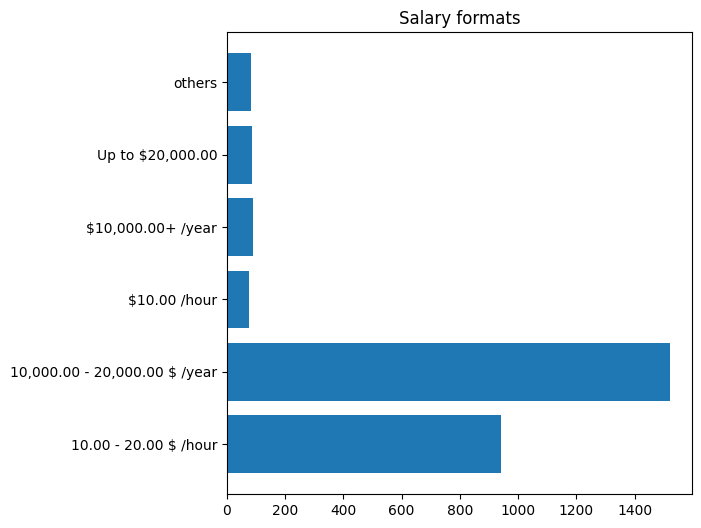

In [ ]:
plt.figure(figsize=(6,6))
plt.barh(width=counter, y=formats)
plt.title('Salary formats')
plt.show()

In [ ]:
format_dict["10.00 - 20.00 $ /hour"].sample(10)

5060                  100.00 - 115.00 $ /hour
9419                    18.15 - 19.15 $ /hour
12846                   20.00 - 22.00 $ /hour
17831                   16.00 - 19.00 $ /hour
9471                     0.00 - 12.00 $ /hour
13770    19.00 - 20.00 $ /hour Great Benefits
9971                    20.00 - 20.00 $ /hour
21815                   15.00 - 16.00 $ /hour
14173                   13.50 - 16.50 $ /hour
43                      15.00 - 16.00 $ /hour
Name: salary, dtype: object

Есть записи для зарплаты в год и в день без явного разграничения. Для разделения их на категории потребуется фильтровать их по размеру суммы.


In [ ]:
salary_period = salary_not_na['salary'].apply(lambda x: re.search('/.+', x).group().strip()[1:].split()[0] if re.search('/.+', x) else np.nan)
salary_not_na.insert(loc=8, column='salary_period', value=salary_period)
salary_not_na['salary'] = salary_not_na['salary'].apply(lambda x: re.sub(',', '', x) if x is not np.nan else x)

In [ ]:
salary_not_na.sample(5)

,job_description,job_title,job_type,city,state,code,organization,salary,salary_period,sector
4545,A Project Manager is needed for a leading Util...,Project Manager - Water & Wastewater /Construc...,Full Time Employee,Washington,DC,20001,NaN,95000.00 - 110000.00 $ /year,year,NaN
274,"Our client located in Anaheim, CA. is currentl...",Customer/Account Service Rep Job in Anaheim,"Full Time, Employee",Anaheim,CA,NaN,Aerospace and DefenseManufacturing - Other,15.00 - 19.00 $ /hour,hour,Administrative/Clerical
10995,Advertising Sales Account Executive Our Advert...,Account Manager- Advertising & Marketing Repre...,"Full Time, Employee",Parkersburg,WV,26102,AllBusiness Services - Other,40000.00 - 100000.00 $ /year,year,Sales/Retail/Business Development
18904,Nurse Practitioner - OncologySan Francisco Bay...,Nurse Practitioner – Oncology Job in San Franc...,Full Time Employee,San Francisco,CA,NaN,Healthcare Services,130000.00 - 165000.00 $ /year,year,Medical/Health
12758,Environmental and Safety Supervisor (manufactu...,Environmental and Safety Supervisor (manufactu...,Full Time,Portland,ME,NaN,Food and Beverage Production,65000.00 - 75000.00 $ /year plus $7k bonus and...,year,Entry Level


<Axes: >

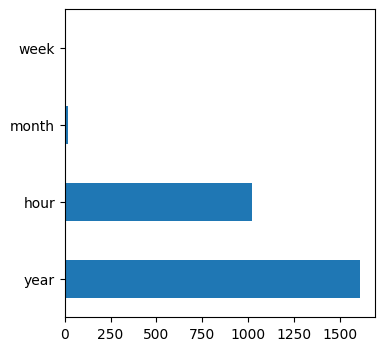

In [ ]:
salary_not_na['salary_period'].value_counts()[:4].plot(kind='barh', figsize=(4,4))

**Что мы можем увидеть?**

Зарплата также может быть указана в месяц (month) и в неделю (week) – учтите это при составлении общего регулярного выражения.

Также в начале некоторых строк есть лишние пробелы, которые мы также учитываем.

Разделим столбец `salary` на зарплаты от, до, временной интервал (час, месяц, год) и бонусы. Для строк не попавших ни в одну категорию или с NaN в колонке salary установим все как NaN.

Также добавим колонку которая разделяет тип предложений (от-до, от, до, нет).

In [ ]:
def split_salary(sal):
  val_from = np.nan
  val_to = np.nan
  val_range = np.nan
  val_bonus = np.nan

  if re.fullmatch("[0-9\.]+ - [0-9\.]+( \$)? .*", sal): # от - до
    vals = list(map(float, re.findall("[0-9]+\.?[0-9]+", sal)))
    val_from = vals[0]
    val_to = vals[1]
    val_range = 'from-to'

  if re.fullmatch("\$?[0-9\.]+\+ .*", sal): # от +
    val_from = list(map(float, re.findall("[0-9]+\.?[0-9]+", sal)))[0]
    val_range = 'from'

  if re.fullmatch("Up to \$?[0-9\.,]+", sal): # до
    val_from = list(map(float, re.findall("[0-9]+\.?[0-9]+", sal)))[0]
    val_range = 'up to'

  return val_range, val_from, val_to

salary_not_na.insert(loc=8, column='salary_range', value=salary_not_na['salary'].apply(lambda x: split_salary(x)[0]))
salary_not_na.insert(loc=9, column='salary_from', value=salary_not_na['salary'].apply(lambda x: split_salary(x)[1]))
salary_not_na.insert(loc=10, column='salary_to', value=salary_not_na['salary'].apply(lambda x: split_salary(x)[2]))

In [ ]:
def find_bonuses(x):
  ranges = ['year', 'week', 'month', 'hour']
  bonus = np.nan
  if bool(re.search("bonus", x, flags=re.IGNORECASE)) or bool(re.search("benefit", x, flags=re.IGNORECASE)):
    one_range = [i for i in ranges if i in x]
    if len(one_range) == 1:
      one = one_range[0]
      bonus = re.search(f"(?<={one}).*", x).group(0).strip()
  return bonus

salary_not_na.insert(loc=12, column='salary_bonus', value=salary_not_na['salary'].apply(lambda x: find_bonuses(x)))

In [ ]:
salary_not_na.sample(5)

,job_description,job_title,job_type,city,state,code,organization,salary,salary_range,salary_from,salary_to,salary_period,salary_bonus,sector
9482,JOB TITLE: Field Service TechnicianR...,Field Service Technician Job in Burlington,Full Time,Burlington,NJ,NaN,NaN,50000.00 - 58000.00 $ /year Plus O.T. Bonus & ...,from-to,50000.0,58000.0,year,Plus O.T. Bonus & Company Vehicle,NaN
5178,"In order to successful in this role, Candidate...",Material Handler- Slip Sheet Experience Requir...,Full Time,Columbus,OH,43207,Consumer Packaged Goods Manufacturing,15.00 - 15.50 $ /year,from-to,15.0,15.5,year,NaN,Entry Level
7183,Warehouse Worker We need high-energy Warehouse...,Upcoming work Middle of January Job in Lithia ...,Full Time Employee,Lithia Springs,GA,30122,Other/Not Classified,9.00 - 9.00 $ /hour,from-to,9.0,9.0,hour,NaN,NaN
5936,"Lease & LaBau, Inc. is your one source for leg...",Corporate Paralegal Job in New York City,Full Time,New York City,NY,10177,Legal Services,70000.00 - 90000.00 $ /year,from-to,70000.0,90000.0,year,NaN,Experienced (Non-Manager)
21529,Job Description IDENTIFICATIONPosition Title:L...,Laboratory Technician Job in Cincinnati,Full Time,Cincinnati,OH,45204,Chemicals/Petro-Chemicals,32000.00 - 38000.00 $ /year profit sharing bonus,from-to,32000.0,38000.0,year,profit sharing bonus,Entry Level


In [ ]:
df = pd.concat([salary_not_na, salary_na])
df.drop('salary', axis=1, inplace=True)
df.sample(5)

,job_description,job_title,job_type,city,state,code,organization,salary_range,salary_from,salary_to,salary_period,salary_bonus,sector
3750,Penn Medicine is dedicated to our tripartite m...,Contract Manager,"Full Time , Employee",Philadelphia,PA,NaN,Healthcare Services,NaN,NaN,NaN,NaN,NaN,Medical/Health
15205,**TERRITORY ALSO COVERS THE FOLLOWING AREAS:Sh...,MEASURE TECH - WORCESTER Job in Worcester,Full Time Employee,Worcester,MA,01601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11706,Skilled Assistant Engineer Job Label:BGF02-632...,Skilled Assistant Engineer Job in San Francisco,Full Time,San Francisco,CA,94133,"Travel, Transportation and Tourism",NaN,NaN,NaN,NaN,NaN,Experienced (Non-Manager)
21348,CUSTOMER SERVICE REPRESENTATIVE First Energ...,Customer Service Representatives- Mon Power Jo...,Full Time,Fairmont,OH,NaN,NaN,from-to,11.0,13.65,hour,NaN,NaN
1160,Software Systems Engineer / Cloud Architect/Au...,Software Systems Engineer Job in Dallas,Full Time Temporary/Contract/Project,Dallas,TX,NaN,Computer/IT Services,from-to,100.0,120.00,hour,NaN,IT/Software Development


#### Обработка колонки job_type

Выясним форматы значений есть в столбце `job_type`.

In [ ]:
job_type_notna = df[df['job_type'].notna()]
job_type_na = df[df['job_type'].isna()]

print(job_type_notna['job_type'].value_counts().sum())
job_type_notna['job_type'].value_counts()

16024


Full Time                                        5913
Full Time Employee                               5304
Full Time, Employee                              2047
Full Time Temporary/Contract/Project              716
Full Time, Temporary/Contract/Project             437
Full Time , Employee                              302
Part Time Employee                                300
Part Time                                         295
Temporary/Contract/Project                        153
Part Time, Employee                               149
Employee                                          131
Full Time / Employee                              102
Full Time , Temporary/Contract/Project             43
Per Diem, Employee                                 21
Per Diem                                           20
Job Type Full Time Employee                        19
Part Time/ Temporary/Contract/Project              14
Part Time Seasonal                                 12
Per Diem Employee           

Многие значения фактически одинаковые, но немного по-разному отформатированы. Исправляем!

In [ ]:
job_type_notna['job_type'] = (job_type_notna['job_type'].apply(lambda x: x.replace(' ,', ',').strip())
.apply(lambda x: x.replace(' /', ', ').strip())
.apply(lambda x: x.replace('Time ', 'Time, ').strip())
.apply(lambda x: x.replace('Time/ ', 'Time, ').strip())
.apply(lambda x: x.replace('Diem ', 'Diem, ').strip())
.apply(lambda x: x.replace('Job Type ', '').strip())
.apply(lambda x: x.replace("  ", ' ').strip()))

job_type_notna['job_type'].value_counts()

Full Time, Employee                      7774
Full Time                                5915
Full Time, Temporary/Contract/Project    1198
Part Time, Employee                       457
Part Time                                 295
Temporary/Contract/Project                153
Employee                                  132
Per Diem, Employee                         32
Part Time, Temporary/Contract/Project      26
Per Diem                                   20
Part Time, Seasonal                        12
Full Time, Intern                           5
Part Time, Intern                           3
Full Time  Employee                         1
Per Diem, Temporary/Contract/Project        1
Name: job_type, dtype: int64

Теперь видно, что тип работы состоит из двух частей: полноты занятости (Full Time, Part Time, ...) и типа занятости (Employee, Intern, ...). Встречаются неполные записи. Будем считать по умолчанию полноту занятости Full Time и тип занятости Employee и разделим эту колонку на две.

In [ ]:
def split_job_type(typ):
  def_full = 'Full Time'
  def_type = 'Employee'
  vals = typ.split(',')
  if len(vals) == 1:
    if vals[0] in ('Full Time', 'Part Time', 'Per Diem'):
      def_full = vals[0]
    else:
      def_type = vals[0]
  else:
    def_full = vals[0]
    def_type = vals[1]
  return def_full, def_type

In [ ]:
job_type_notna.insert(loc=3, column='empl_fullness', value=job_type_notna['job_type'].apply(lambda x: split_job_type(x)[0]))
job_type_notna.insert(loc=4, column='empl_type', value=job_type_notna['job_type'].apply(lambda x: split_job_type(x)[1]))

In [ ]:
df = pd.concat([job_type_notna, job_type_na])
df.drop('job_type', axis=1, inplace=True)
df.sample(5)

,job_description,job_title,empl_fullness,empl_type,city,state,code,organization,salary_range,salary_from,salary_to,salary_period,salary_bonus,sector
5765,SUBROGATION PARALEGALATLANTA OFFICE The Atlant...,Paralegal Job in Atlanta,Full Time,Employee,Atlanta,GA,30309,Legal Services,NaN,NaN,NaN,NaN,NaN,Experienced (Non-Manager)
3714,Registered Nurse (RN) - Travel - ICUNursing yo...,Registered Nurse (RN) - Travel - ICU Job in Pa...,Full Time,Temporary/Contract/Project,Pasadena,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical/Health
16598,Location US-OH-Dublin ID 70881 Posted Date ...,Lead General Utility Worker - Cardinal Health ...,Full Time,Employee,Dublin,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food Services/Hospitality
19371,Restaurant Assistant ManagerFirst introduced ...,Restaurant Assistant Manager: Pie Five Pizza C...,Full Time,Employee,Springfield,MO,65810,NaN,NaN,NaN,NaN,NaN,NaN,Student (High School)
9105,Full Time position available at our Seaford Me...,Maintenance Technician Job in Seaford,Full Time,Employee,Seaford,DE,19973,Real Estate/Property Management,NaN,NaN,NaN,NaN,NaN,Experienced (Non-Manager)


Колонку `job_description` оставим без изменения, так как она содержит текстовое описание вакансии.

### Столбцы job_title, organization, sector

Столбец ['job_title'], как выяснилось в начале анализа, всегда заполнен, поэтому для его отчистки нет необходимости создавать новый датасет. То же самое нельзя сказать для других колонок ['organization'] и ['sector'], поэтому их стоит анализировать на копиях датасета без пустых значений.

In [ ]:
df['job_title'].value_counts().sample(10)

Scrum Master                                                    1
Health Care Silutions Manager Job in Marquette                  1
Lifestyle Manager / Activities Director Job in Winter Garden    1
SAP MII Solution Architect Job in Cary                          1
Bilingual Staff Accountant Job in San Diego                     1
Risk Control Evaluation Analyst Job in Chicago                  1
M/WBE & Section  Compliance Coordinator Job in Brooklyn         1
Surgical Technician Job in Hayward                              1
Quality Assurance Specialist Job in Frisco                      1
Planning Division Intern Job in New York City                   1
Name: job_title, dtype: int64

Избавим столбец от лишних данных локации в формате "Job in..."

In [ ]:
df['job_title'] = df['job_title'].apply(lambda x: re.sub('Job.*', '', x))
df['job_title'].value_counts().sample(10)

**Seasonal Holiday Culinary Food Demonstrator** Part Time Macy's Mall Of America     1
Personal Banker (SAFE)  Lake Mead and Jones  Hours                                   1
Restaurant Manager $                                                                 2
nd Shift Environmental Services Tech                                                 1
Computer Operator                                                                    6
Occupational Therapist - Dayton                                                      1
Safety Education Program Specialist                                                  1
Pickers & Packers Needed!!                                                           1
Enterprise Analyst- Epic OpTime                                                      1
Dispatcher                                                                           1
Name: job_title, dtype: int64

**Вывод:** многие названия должности включают в себя дополнительную информацию из других столбцов, заключённую в скобках или между тире. К сожалению, эту информацию тяжело вычленить и корректно распределить по колонкам.

In [ ]:
org_notna = df[df['organization'].notna()]
org_na = df[df['organization'].isna()]

org_notna['organization'].value_counts()

Healthcare Services                                                                 1399
All                                                                                  944
Other/Not Classified                                                                 893
Manufacturing - Other                                                                732
Computer/IT Services                                                                 628
                                                                                    ... 
Manufacturing - OtherTransport and Storage - Materials Business Services - Other       1
Hotels and LodgingEntertainment Venues and TheatersFood and Beverage Production        1
All;Advertising and PR Services;Business Services - Other                              1
Aerospace and Defense Legal Services                                                   1
Accounting and Auditing ServicesHealthcare ServicesGovernment and Military             1
Name: organization, L

Убираем лишнюю информацию, не влияющую на анализ.

In [ ]:
org_notna['organization'] = (org_notna['organization'].apply(lambda x: re.sub("(All)|(Other)", '', x).strip())
.apply(lambda x: re.sub(" -", ' ', x).strip())
.apply(lambda x: re.sub("/Not Classified", '', x).strip())
.apply(lambda x: re.sub("  ", ' ', x).strip()))

org_notna['organization'].value_counts()

                                                                                      1837
Healthcare Services                                                                   1497
Manufacturing                                                                          734
Computer/IT Services                                                                   629
Retail                                                                                 452
                                                                                      ... 
Manufacturing Legal ServicesHealthcare Services                                          1
Sports and Physical RecreationRestaurant/Food ServicesFood and Beverage Production       1
Staffing/Employment AgenciesBusiness Services                                            1
Travel, Transportation and TourismInsuranceAutomotive Sales and Repair Services          1
Accounting and Auditing ServicesHealthcare ServicesGovernment and Military               1

Разделяем склеенные слова, убираем лишние знаки препинания и пробелы, заполняем пустые значения.

In [ ]:
org_notna['organization'] = (org_notna['organization'].apply(lambda x: ' '.join(re.sub( r"([A-Z])", r" \1", x).split()))
.apply(lambda x: re.sub(";$", '', x))
.apply(lambda x: re.sub("/ ", '/', x))
.apply(lambda x: re.sub("P R", 'PR', x))
.apply(lambda x: re.sub("I T", 'IT', x)))
org_notna['organization'] = org_notna['organization'].apply(lambda x: np.nan if not x else x)

org_notna['organization'].value_counts()

Healthcare Services                                                                 1497
Manufacturing                                                                        734
Computer/IT Services                                                                 629
Retail                                                                               452
Business Services                                                                    396
                                                                                    ... 
Accounting and Auditing Services Staffing/Employment Agencies Financial Services       1
Staffing/Employment Agencies Government and Military                                   1
Banking Nonprofit Charitable Organizations Financial Services                          1
Manufacturing Legal Services Healthcare Services                                       1
Accounting and Auditing Services Healthcare Services Government and Military           1
Name: organization, L

In [ ]:
df = pd.concat([org_notna, org_na])
df['organization'].fillna(np.nan)
df.sample(5)

,job_description,job_title,empl_fullness,empl_type,city,state,code,organization,salary_range,salary_from,salary_to,salary_period,salary_bonus,sector
5143,Summary Event Specialist Part Time Sales Are...,Event Specialist Part Time Sales,Part Time,Employee,Hilliard,OH,NaN,Retail,NaN,NaN,NaN,NaN,NaN,Sales/Retail/Business Development
5962,Spanish Teacher for busy Executive. Candidate ...,Spanish Tutor,Full Time,Employee,Dallas,TX,75219,NaN,from-to,20.0,25.0,hour,NaN,NaN
17590,Registered Nurse - Director - Behavioral Healt...,Registered Nurse - Director - Behavioral Health,Full Time,Employee,Dallas,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical/Health
9760,"At Anixter, we help build, connect, protect, a...",Warehouse Associate / Driver,NaN,NaN,Nashville,TN,NaN,Manufacturing,NaN,NaN,NaN,NaN,NaN,NaN
229,About Aramark Aramark (NYSE: ARMK) is in the c...,Housekeeper - CHI - St Lukes O'Quinn Medical T...,Full Time,Employee,Houston,TX,77025,NaN,NaN,NaN,NaN,NaN,NaN,Installation/Maintenance/Repair


Разберёмся со столбцом сектора.

In [ ]:
sector_notna = df[df['sector'].notna()]
sector_na = df[df['sector'].isna()]

sector_notna['sector'].value_counts()

Experienced (Non-Manager)                                                                        3816
Entry Level                                                                                      1000
Medical/Health                                                                                    918
Manager (Manager/Supervisor of Staff)                                                             803
Sales/Retail/Business Development                                                                 745
                                                                                                 ... 
Real Estate Leasing/Acquisition                                                                     1
Occupational Health and Safety                                                                      1
Food Safety and InspectionGeneral/Other: Quality Assurance/SafetyProduction Quality Assurance       1
Computer/Network SecurityNetwork and Server AdministrationSystems Analysis - IT   

Выполняем аналогичные действия: расклеиваем слова, удаляем лишние информацию и знаки препинания, заполняем пустые значения.

In [ ]:
sector_notna['sector'] = (sector_notna['sector'].apply(lambda x: re.sub("(All)|(Other)|(General/Other: )|(, etc)", '', x).strip())
.apply(lambda x: ' '.join(re.sub( r"([A-Z])", r" \1", x).split()))
.apply(lambda x: re.sub("/ ", '/', x))
.apply(lambda x: re.sub("\( ", ' (', x))
.apply(lambda x: re.sub("- ", '-', x))
.apply(lambda x: re.sub("P R", 'PR', x))
.apply(lambda x: re.sub("I T", 'IT', x))
.apply(lambda x: np.nan if not x else x))

sector_notna['sector'].value_counts()

Experienced  (Non-Manager)                                                                                                        3816
Entry Level                                                                                                                       1000
Medical/Health                                                                                                                     996
Manager  (Manager/Supervisor of Staff)                                                                                             803
Sales/Retail/Business Development                                                                                                  745
                                                                                                                                  ... 
Equipment Operations                                                                                                                 1
Computer/Electronics/Telecomm Install/Maintain/Repair E

In [ ]:
df = pd.concat([sector_notna, sector_na])
df.sample(5)

,job_description,job_title,empl_fullness,empl_type,city,state,code,organization,salary_range,salary_from,salary_to,salary_period,salary_bonus,sector
7435,TeamSoft is looking for a System Support Analy...,System Support Analyst,Full Time,Temporary/Contract/Project,Madison,WI,53703,NaN,NaN,NaN,NaN,NaN,NaN,IT/Software Development
5858,"Immediate opening for an experienced, full-tim...",Real Estate Paralegal,Full Time,Employee,Great Neck,NY,11021,Real Estate/Property Management,from-to,40000.0,50000.0,year,NaN,Experienced (Non-Manager)
1689,Job DescriptionEaton’s Aerospace division is s...,Senior Quality Engineer - New Program Developm...,Full Time,Employee,Jackson,MI,49202,NaN,NaN,NaN,NaN,NaN,NaN,Quality Assurance/Safety
5070,3PL Operatons Account ManagerPerm: 90-110KMust...,PL Operatons Account Manager,Full Time,Employee,Columbus,OH,NaN,Transport and Storage Materials,from-to,90000.0,110000.0,year,NaN,NaN
4295,The Maintenance Technician (MT) will be respon...,Maintenance Technician,NaN,NaN,Hebron,KY,41048,NaN,NaN,NaN,NaN,NaN,NaN,Installation/Maintenance/Repair


### Краткая статистика очищенных данных

Анализ результаты обработки данных.
1. Что было до и после?
2. Какие еще этапы можно было бы включить?
3. Какие задачи можно решать с помощью обработанного датасета и какие этапы обработки в таком случае можно добавить?

**Вывод:**
1. Датасет был приведён к наилучшему виду. Данные были почищены и отформатированы, разделены на несколько столбцов для оптимальной обработки и читаемости. Датасет был избавлен от неактульных столбцов и дублирующихся строк.
2. В рамках последних штрихов была выявлена и выполнена задача, которая заключалась в определении конкретных бонусов и бенефитов работы в столбце ['salary']. Изначально они записывались как булевое значение наличия/отсутствия бонусов, теперь программа выводит строки, содержащие условия бонусов.
3. Например, с помощью данного датасета можно выявить, какие вакансии наиболее актуальны в США (сколько специалистов требуется, в каком регионе, какая зп и занятость). Это решение может помочь абитуриентам определиться с выбором карьеры.

  Для этого можно добавить новую функцию, которая будет выводить столбец с требуемым для работы университетским образованием или дополнительными курсами.

In [ ]:
df_copy.describe()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
count,22000,22000,122,22000,22000,22000,22000,20372,22000,15133,22000,3446,16806,22000
unique,1,1,78,1,1,18744,18759,39,8423,738,22000,1737,163,22000
top,United States of America,US,9/22/2016,No,jobs.monster.com,12N Horizontal Construction Engineers Job Desc...,Monster,Full Time,"Dallas, TX",Healthcare Services,http://jobview.monster.com/it-support-technici...,"40,000.00 - 100,000.00 $ /year",Experienced (Non-Manager),11d599f229a80023d2f40e7c52cd941e
freq,22000,22000,6,22000,22000,104,318,6757,646,1919,1,50,4594,1


In [ ]:
df.describe(include='all').loc[['count', 'unique', 'top', 'freq'], :]

,job_description,job_title,empl_fullness,empl_type,city,state,code,organization,salary_range,salary_from,salary_to,salary_period,salary_bonus,sector
count,17233,17233,16024,16024,16788,16683,10985,9640,2744,2744.0,2493.0,2661,244,13522
unique,15344,11860,3,7,2721,55,4279,368,3,NaN,NaN,14,186,143
top,12N Horizontal Construction Engineers Job Desc...,Project Manager,Full Time,Employee,Dallas,TX,75201,Healthcare Services,from-to,NaN,NaN,year,Bonus,Experienced (Non-Manager)
freq,93,114,15178,8263,1215,2652,277,1497,2493,NaN,NaN,1610,18,3816


In [ ]:
df_copy.sample(10)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
13142,United States of America,US,NaN,No,jobs.monster.com,Position ID# 59055 # Positions 1 State MD C...,Shift Supervisor Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/Shift-Supervisor-Jo...,NaN,Project/Program Management,d66188251c4e5d0993ea5ea3a37aaa42
19211,United States of America,US,NaN,No,jobs.monster.com,We are seeking bachelor degreed individuals; p...,Surgical Neuro Monitoring Technologist-Tulsa J...,Full Time,"Tulsa, OK 74105",Healthcare Services,http://jobview.monster.com/Surgical-Neuro-Moni...,NaN,Entry Level,c2ea1aa479c5beed64ed9d5969863d73
9154,United States of America,US,NaN,No,jobs.monster.com,Associate is responsible for building loads fo...,Yard Associate (Benefits) ( G ) Job in Elkton,Full Time Employee,84 Lumber,NaN,http://jobview.monster.com/Yard-Associate-Bene...,NaN,Installation/Maintenance/Repair,3065383c8ae0de4baa21ef1999448558
16032,United States of America,US,NaN,No,jobs.monster.com,Merchandising Execution Associates (MEAs) perf...,Merchandising Job in Cincinnati,Full Time,"Cincinnati, OH",Retail,http://jobview.monster.com/merchandising-job-c...,NaN,Experienced (Non-Manager),9ad386a04bc43ac95c09a60cb6ecf958
2798,United States of America,US,NaN,No,jobs.monster.com,Position Number: 2155-847-041516 Open Date: 4/...,Licensed Clinical Social Worker Job in West Pa...,Full Time,"West Palm Beach, FL",Healthcare Services,http://jobview.monster.com/Licensed-Clinical-S...,NaN,Experienced (Non-Manager),e626cf37cd729bc640368f186bab7626
5114,United States of America,US,NaN,No,jobs.monster.com,"Through its people and brands, CNH Industrial ...",Inventory Analyst - East/Northeast - Field Emp...,Full Time Employee,"Columbus, OH 43085",CNH Industrial,http://jobview.monster.com/Inventory-Analyst-E...,NaN,Manufacturing/Production/Operations,a99bd5516e49187fc96bc6078fb70247
4909,United States of America,US,NaN,No,jobs.monster.com,Position Title: .NET Developer Location : Colu...,.NET Developer Job in Columbus,Full Time,"Columbus, OH 43204",Internet Services,http://jobview.monster.com/NET-Developer-Job-C...,NaN,Experienced (Non-Manager),84ea9ff014f07b69f279cd40303732c7
6557,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job We are a stable ...,CyberCoders Job Application for Senior Project...,"Full Time, Employee",Contact name Daniel Nadruz,Construction - Industrial Facilities and Infra...,http://jobview.monster.com/senior-project-mana...,NaN,NaN,d0b495d2ec64f65d46c2fe247b5dc6d2
10956,United States of America,US,NaN,No,jobs.monster.com,Aflac Insurance Sales Agent While a career in ...,Aflac Insurance Sales Agent Job in La Mesa,Full Time,"La Mesa, CA 91941",Insurance,http://jobview.monster.com/aflac-insurance-sal...,NaN,Sales/Retail/Business Development,92b399244091c14b478daa0adec5add7
19255,United States of America,US,NaN,No,jobs.monster.com,United Vending & Food Service (UVFS) is seekin...,Cafeteria Night Manager Job in Saint Joseph,Full Time,"Saint Joseph, MO 64504",Restaurant/Food Services,http://jobview.monster.com/Cafeteria-Night-Man...,NaN,Manager (Manager/Supervisor of Staff),4e1088d2488f68b4b712c6f03370e269


In [ ]:
df.sample(10)

,job_description,job_title,empl_fullness,empl_type,city,state,code,organization,salary_range,salary_from,salary_to,salary_period,salary_bonus,sector
9490,Hertz Local Edition is seeking professionals t...,Transporter - HLE (HLE.Transporter - HLE..Oper...,Full Time,Employee,Torrance,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manufacturing/Production/Operations
19067,Job DescriptionI believe that the care we give...,Executive Director - Hospice Operations,NaN,NaN,Phenix City,AL,NaN,Healthcare Services,NaN,NaN,NaN,NaN,NaN,NaN
14283,Intelligent Transportation Systems (ITS) Senio...,Intelligent Transportation Systems (ITS) Senio...,Full Time,Employee,Memphis,TN,NaN,Engineering Services,NaN,NaN,NaN,NaN,NaN,Logistics/Transportation
18528,Certified Medical Assistant - Healthcare - Med...,Certified Medical Assistant,Full Time,Employee,Pomona,NY,NaN,Healthcare Services,from-to,14.0,17.0,hour,NaN,Entry Level
9692,Title: HVAC Service TechnicianCompany: Confide...,HVAC Service Technician,Full Time,Employee,Porter,NaN,77365,NaN,NaN,NaN,NaN,NaN,NaN,Experienced (Non-Manager)
7080,We have an outstanding career opportunity for ...,Sales Representative - Government Sales - Lega...,Full Time,Employee,Long Beach,CA,90745,Legal Services,NaN,NaN,NaN,NaN,NaN,Sales/Retail/Business Development
9615,"Located in beautiful downtown Nashville, TN, H...",Maintenance Technician,Full Time,Employee,Nashville,TN,37203,Healthcare Services,NaN,NaN,NaN,NaN,NaN,Installation/Maintenance/Repair
2040,As the Social Media Coordinator you will be th...,Social Media Coordinator,Full Time,Employee,Birmingham,AL,NaN,Retail,NaN,NaN,NaN,NaN,NaN,Experienced (Non-Manager)
3905,"Parkside Drive | Kingston Pike AUTOMOTIVE, FOR...",SALES,Full Time,Employee,Knoxville,TN,37919,Retail,NaN,NaN,NaN,NaN,NaN,Entry Level
12070,ASSOCIATE ATTORNEYIf you have at least five (5...,Associate Attorney,Full Time,Employee,Cleveland,OH,44139,Legal Services,NaN,NaN,NaN,NaN,NaN,NaN
